In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Charger les données nettoyées depuis l'adresse indiquée
file_path = "C:/Users/floriandeharo/scrap/indeed_jobs_cleaned.csv"
df = pd.read_csv(file_path)


In [5]:
# Extraction de la moyenne des salaires à partir de la colonne 'salary'
def average_salary(salary):
    if pd.isna(salary):
        return None

    # Extraction des montants numériques
    amounts = re.findall(r'\d+', salary)
    if len(amounts) == 2:
        min_salary, max_salary = int(amounts[0]), int(amounts[1])
        return (min_salary + max_salary) / 2  # Moyenne de la plage
    elif len(amounts) == 1:
        return int(amounts[0])  # Valeur unique
    else:
        return None

# Appliquer la fonction et créer une nouvelle colonne 'average_salary'
df['average_salary'] = df['salary'].apply(average_salary)


In [6]:
df = df[df['average_salary'] <= 1000000]


In [7]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Premier quartile
    Q3 = data[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers(df, 'average_salary')


In [8]:
print("Statistiques descriptives des salaires (sans outliers) :")
print(df['average_salary'].describe())


Statistiques descriptives des salaires (sans outliers) :
count       70.00000
mean     42937.70000
std       6354.26648
min      27000.00000
25%      38625.00000
50%      42500.00000
75%      47500.00000
max      55000.00000
Name: average_salary, dtype: float64


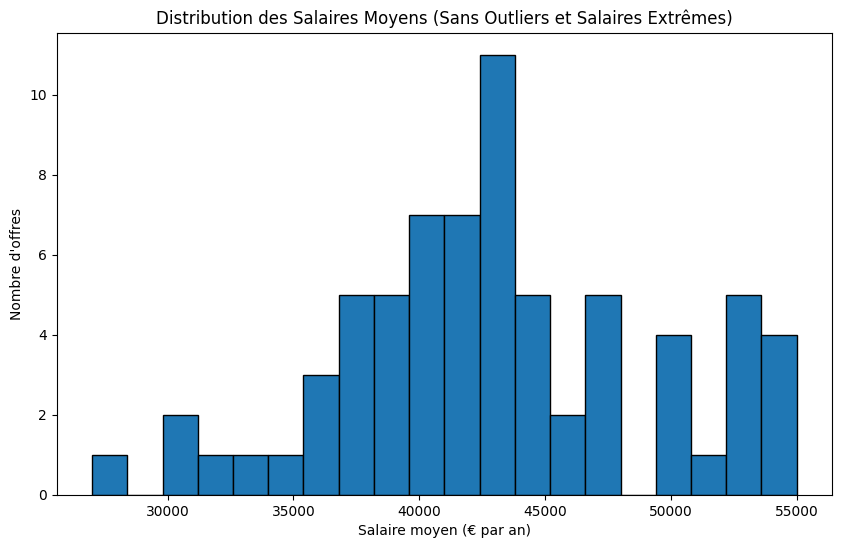

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_salary'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Salaire moyen (€ par an)")
plt.ylabel("Nombre d'offres")
plt.title("Distribution des Salaires Moyens (Sans Outliers et Salaires Extrêmes)")
plt.show()


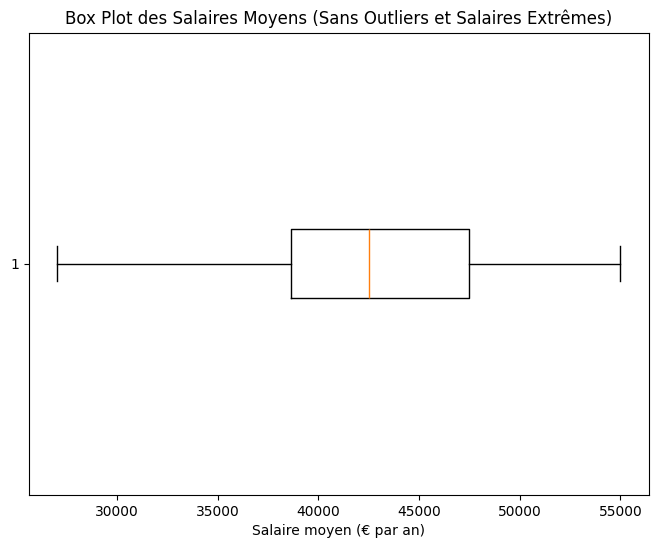

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['average_salary'].dropna(), vert=False)
plt.xlabel("Salaire moyen (€ par an)")
plt.title("Box Plot des Salaires Moyens (Sans Outliers et Salaires Extrêmes)")
plt.show()


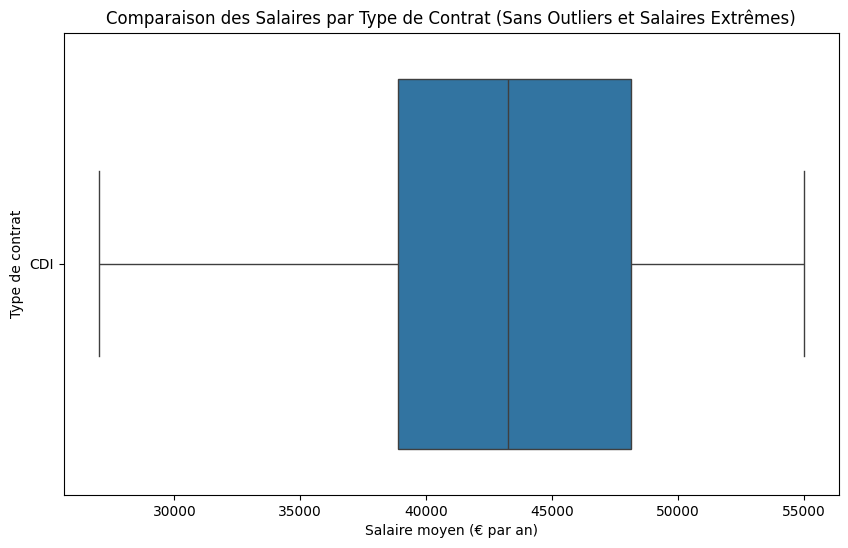

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='average_salary', y='contract_type')
plt.xlabel("Salaire moyen (€ par an)")
plt.ylabel("Type de contrat")
plt.title("Comparaison des Salaires par Type de Contrat (Sans Outliers et Salaires Extrêmes)")
plt.show()


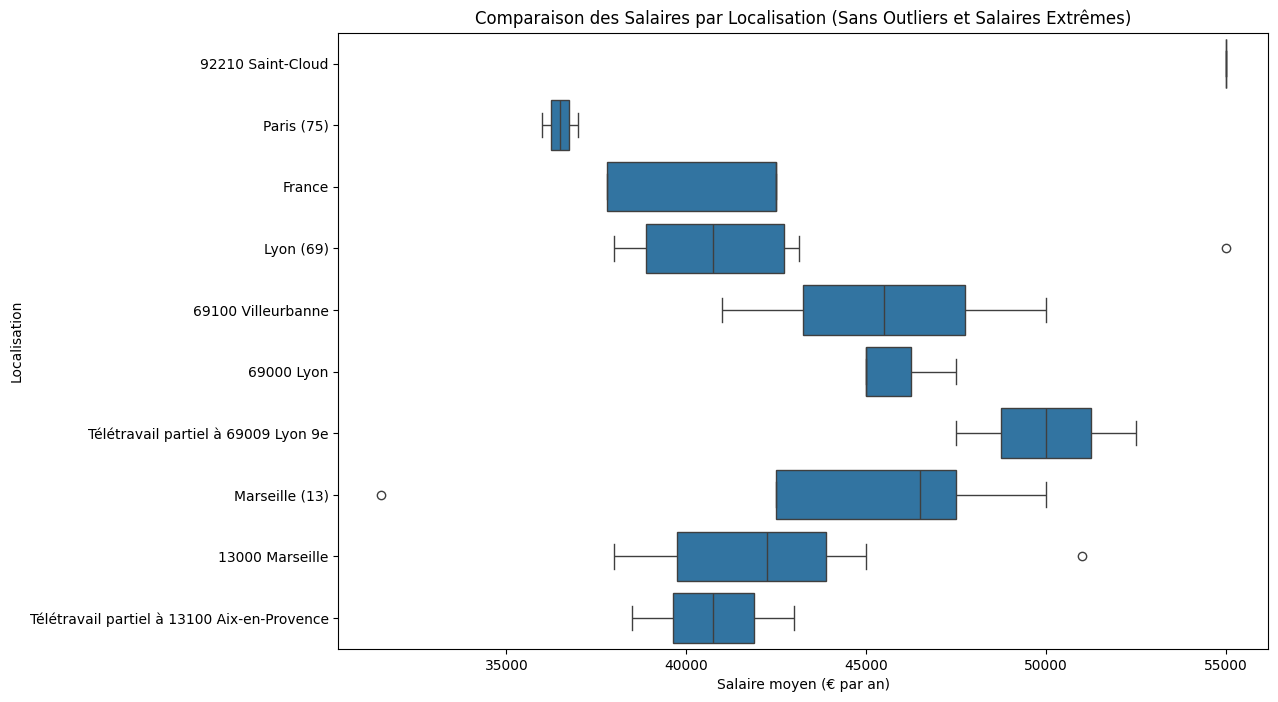

In [12]:
top_locations = df['location'].value_counts().nlargest(10).index
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_locations, x='average_salary', y='location')
plt.xlabel("Salaire moyen (€ par an)")
plt.ylabel("Localisation")
plt.title("Comparaison des Salaires par Localisation (Sans Outliers et Salaires Extrêmes)")
plt.show()


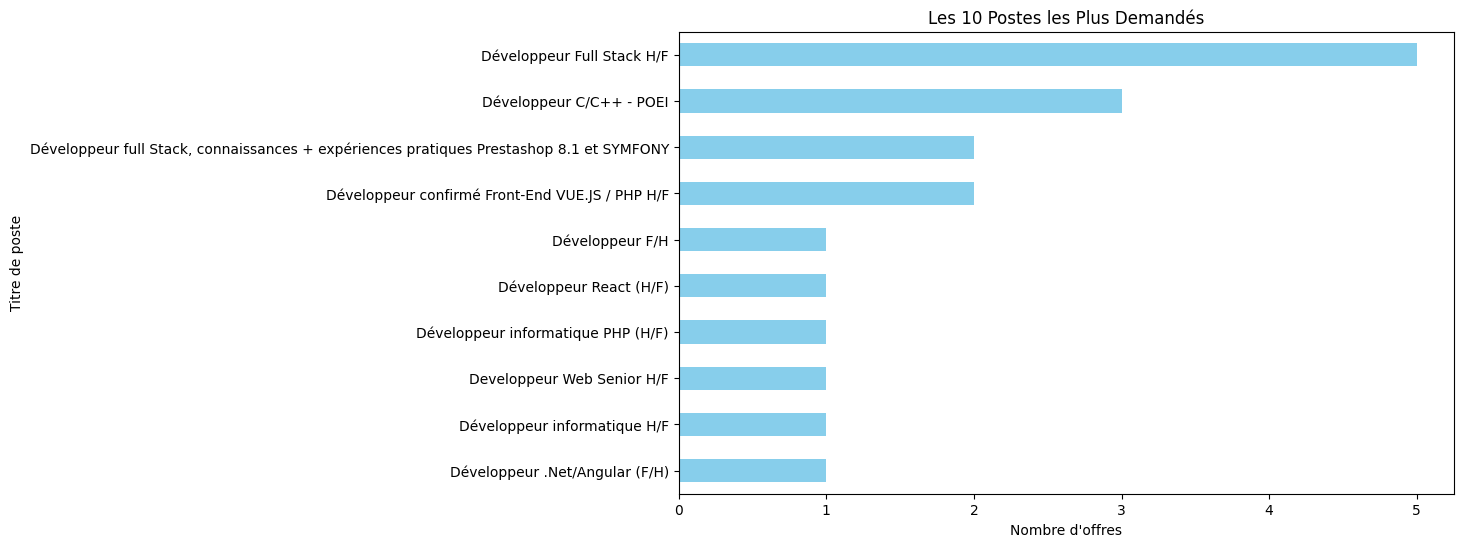

In [13]:
top_jobs = df['title'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_jobs.plot(kind='barh', color='skyblue')
plt.xlabel("Nombre d'offres")
plt.ylabel("Titre de poste")
plt.title("Les 10 Postes les Plus Demandés")
plt.gca().invert_yaxis()  # Inverser l'ordre pour une meilleure lisibilité
plt.show()


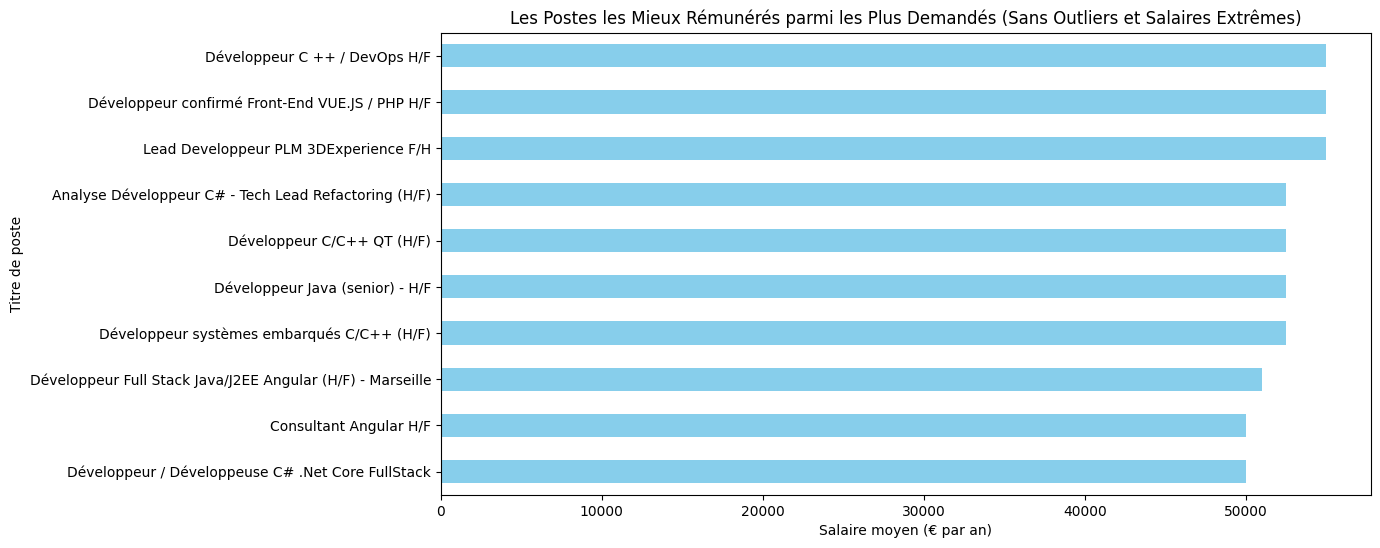

In [14]:
top_jobs_salary = df.groupby('title')['average_salary'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_jobs_salary.plot(kind='barh', color='skyblue')
plt.xlabel("Salaire moyen (€ par an)")
plt.ylabel("Titre de poste")
plt.title("Les Postes les Mieux Rémunérés parmi les Plus Demandés (Sans Outliers et Salaires Extrêmes)")
plt.gca().invert_yaxis()  # Inverser l'ordre pour une meilleure lisibilité
plt.show()


In [15]:
variability_by_contract_location = df.groupby(['contract_type', 'location'])['average_salary'].std().dropna()

print("Variabilité des Salaires par Type de Contrat et Localisation (Sans Outliers et Salaires Extrêmes) :")
print(variability_by_contract_location)


Variabilité des Salaires par Type de Contrat et Localisation (Sans Outliers et Salaires Extrêmes) :
contract_type  location          
CDI            13000 Marseille        4433.369137
               69100 Villeurbanne     6363.961031
               Lyon (69)              9545.941546
               Marseille (13)        11313.708499
Name: average_salary, dtype: float64
